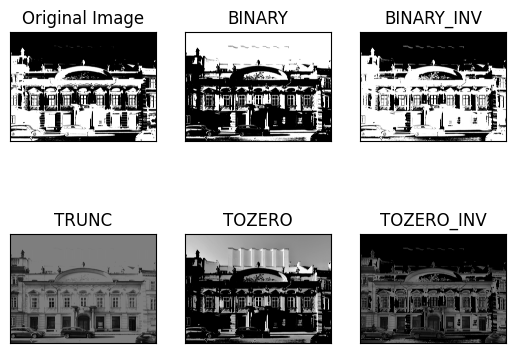

In [24]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('pic_1.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret,thresh1 = cv.threshold(gray,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(gray,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(gray,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(gray,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(gray,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [thresh, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


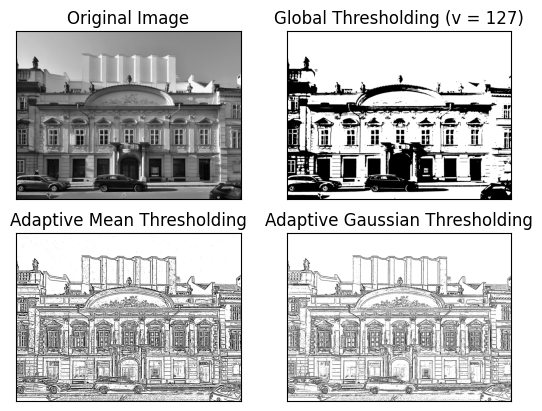

In [ ]:
img = cv.imread('pic_1.jpg', cv.IMREAD_GRAYSCALE)
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,89,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)

## мб добавить cv.THRESH_OTSU
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

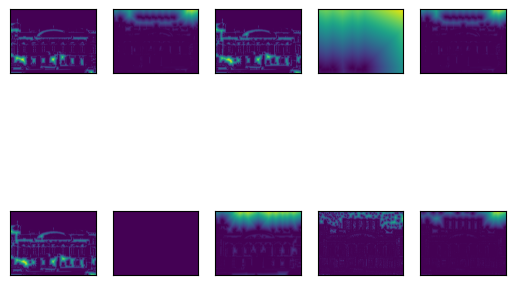

[array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33805615, 0.33805615, 0.33805615, ..., 0.4251548 , 0.42808792,
        0.43102106],
       [0.34481728, 0.34481728, 0.34481728, ..., 0.43191594, 0.43484905,
        0.43778217],
       [0.35157838, 0.35157838, 0.35157838, ..., 0.43867704, 0.4416102 ,
        0.4445433 ]], shape=(2091, 2792), dtype=float32), array([[0.541466  , 0.5407969 , 0.5401277 , ..., 0.858136  , 0.85880506,
        0.85947424],
       [0.53992355, 0.5392544 , 0.53858525, ..., 0.8565935 , 0.85726255,
        0.85793173],
       [0.5383811 , 0.537712  , 0.5370428 , ..., 0.855051  , 0.85572004,
        0.8563892 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]

In [26]:
#dist = cv.distanceTransform(th2, cv.DIST_L2, 3)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
#cv.normalize(dist, dist, 0, 1.0, cv.NORM_MINMAX)

#plt.imshow(dist)
#plt.show()

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV',
          'Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [thresh, thresh1, thresh2, thresh3, thresh4, thresh5, img, th1, th2, th3]
distns = []
for i in range(10):
    dist = cv.distanceTransform(images[i], cv.DIST_L2, 3)
    distns.append(dist)
    cv.normalize(dist, dist, 0, 1.0, cv.NORM_MINMAX)
    plt.subplot(2,5,i+1), plt.imshow(dist)
    plt.xticks([]),plt.yticks([])
plt.show()

print(distns)

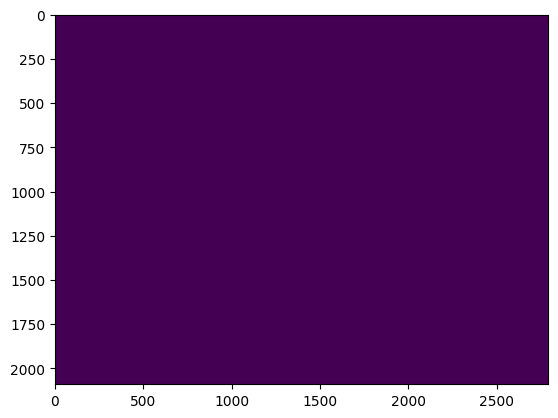

In [ ]:
## Должно работать??

dist_8u = distns[0].astype('uint8')
 
# Find total markers
contours, _ = cv.findContours(dist_8u, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
 
# Create the marker image for the watershed algorithm
markers = np.zeros(distns[0].shape, dtype=np.int32)
 
# Draw the foreground markers
for i in range(len(contours)):
    cv.drawContours(markers, contours, i, (i+1), -1)
 
# Draw the background marker
cv.circle(markers, (5,5), 3, (255,255,255), -1)
markers_8u = (markers * 10).astype('uint8')
plt.imshow(markers_8u)
plt.show()

In [41]:
print(type(distns[0]))

<class 'numpy.ndarray'>


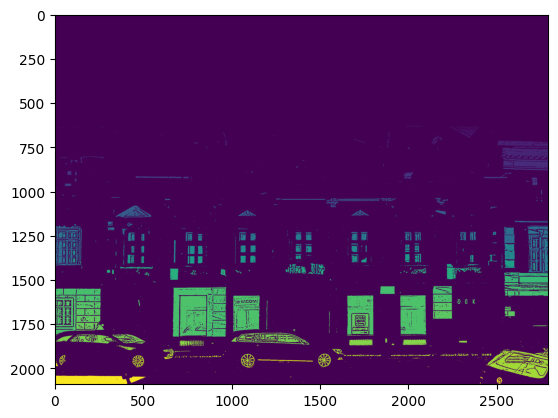

<class 'numpy.ndarray'>


In [50]:
# Marker labelling
ret, markers = cv.connectedComponents(th3)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
##markers[unknown==255] = 0
plt.imshow(markers)
plt.show()
print(type(markers))


Ссылка https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

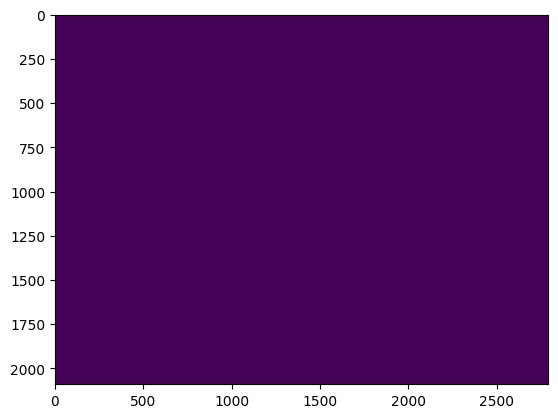

In [ ]:
## добавить unknown регион из ссылкиъ
## убрать фон
image = cv.imread('pic_1.jpg')
markers = cv.watershed(img,markers)
plt.imshow(markers)
plt.show()
## возможно маркеры покрывают всю поверхность вместе с фоном

In [57]:
th6 = cv.adaptiveThreshold(markers,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
plt.imshow(th6)
plt.show()
## затрехолдить получившуюся картинку

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1908: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


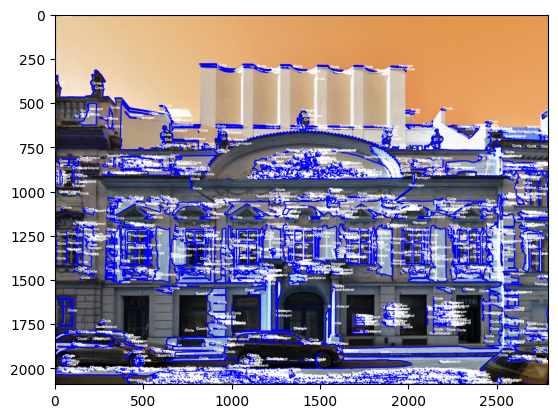

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('pic_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Process each contour
for i, contour in enumerate(contours):
    if i == 0:
        continue

    # Approximate contour shape
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)

    # Draw contour
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

    # Find center
    M = cv2.moments(contour)
    if M['m00'] != 0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])

    # Detect shape
    sides = len(approx)
    if sides == 3:
        label = 'Triangle'
    elif sides == 4:
        label = 'Quadrilateral'
    elif sides == 5:
        label = 'Pentagon'
    elif sides == 6:
        label = 'Hexagon'
    else:
        label = 'Circle'

    # Label the shape
    cv2.putText(img, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
plt.imshow(img)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_65572\4237822384.py:23: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(edges)


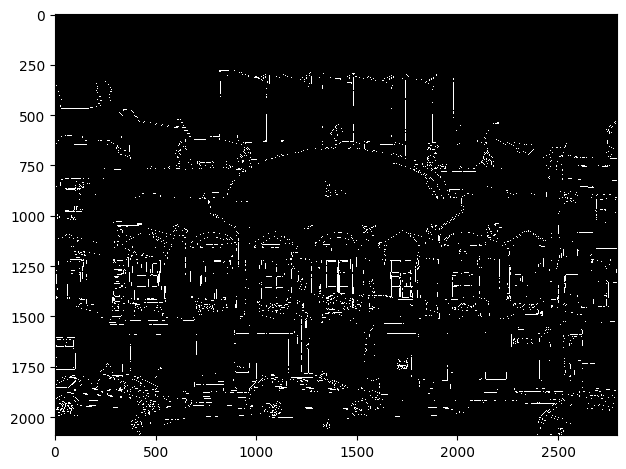

In [ ]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import skimage.feature
import numpy as np
from pandas import DataFrame


# С помощью сanny edge detector находим края
filename = 'pic_1.jpg'
sigma = 1.50            # Настраиваем параметры, пока
low_threshold = 0.0     # не удовлетримся результатом
high_threshold = 110.0  #
image = iio.imread(uri=filename, mode="L")

edges = skimage.feature.canny(
    image=image,
    sigma=sigma,
    low_threshold=low_threshold,
    high_threshold=high_threshold,
)

# Выводим результат
skimage.io.imshow(edges)
plt.show()

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng

 

src = cv.imread('pic_1.jpg')

 
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
 
# do the laplacian filtering as it is
# well, we need to convert everything in something more deeper then CV_8U
# because the kernel has some negative values,
# and we can expect in general to have a Laplacian image with negative values
# BUT a 8bits unsigned int (the one we are working with) can contain values from 0 to 255
# so the possible negative number will be truncated
imgLaplacian = cv.filter2D(src, cv.CV_32F, kernel)
sharp = np.float32(src)
imgResult = sharp - imgLaplacian
 
# convert back to 8bits gray scale
imgResult = np.clip(imgResult, 0, 255)
imgResult = imgResult.astype('uint8')
imgLaplacian = np.clip(imgLaplacian, 0, 255)
imgLaplacian = np.uint8(imgLaplacian)
 
#cv.imshow('Laplace Filtered Image', imgLaplacian)
cv.imshow('New Sharped Image', imgResult)
 
 
 
bw = cv.cvtColor(imgResult, cv.COLOR_BGR2GRAY)
_, bw = cv.threshold(bw, 40, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
cv.imshow('Binary Image', bw)
 
 
 
dist = cv.distanceTransform(bw, cv.DIST_L2, 3)
 
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv.normalize(dist, dist, 0, 1.0, cv.NORM_MINMAX)
cv.imshow('Distance Transform Image', dist)
 
 
 
_, dist = cv.threshold(dist, 0.4, 1.0, cv.THRESH_BINARY)
 
# Dilate a bit the dist image
kernel1 = np.ones((3,3), dtype=np.uint8)
dist = cv.dilate(dist, kernel1)
cv.imshow('Peaks', dist)
 
 
 
dist_8u = dist.astype('uint8')
 
# Find total markers
contours, _ = cv.findContours(dist_8u, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
 
# Create the marker image for the watershed algorithm
markers = np.zeros(dist.shape, dtype=np.int32)
 
# Draw the foreground markers
for i in range(len(contours)):
    cv.drawContours(markers, contours, i, (i+1), -1)
 
# Draw the background marker
cv.circle(markers, (5,5), 3, (255,255,255), -1)
markers_8u = (markers * 10).astype('uint8')
cv.imshow('Markers', markers_8u)
 
 
 
cv.watershed(imgResult, markers)
 
#mark = np.zeros(markers.shape, dtype=np.uint8)
mark = markers.astype('uint8')
mark = cv.bitwise_not(mark)
# uncomment this if you want to see how the mark
# image looks like at that point
#cv.imshow('Markers_v2', mark)
 
# Generate random colors
colors = []
for contour in contours:
    colors.append((rng.randint(0,256), rng.randint(0,256), rng.randint(0,256)))
 
# Create the result image
dst = np.zeros((markers.shape[0], markers.shape[1], 3), dtype=np.uint8)
 
# Fill labeled objects with random colors
for i in range(markers.shape[0]):
    for j in range(markers.shape[1]):
        index = markers[i,j]
        if index > 0 and index <= len(contours):
            dst[i,j,:] = colors[index-1]
 
# Visualize the final image
cv.imshow('Final Result', dst)
 
 
cv.waitKey()

-1